In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import re
from sklearn.cluster import DBSCAN  # For DBSCAN
import numpy as np
#%matplotlib inline

In [ ]:
pip install opencv-contrib-python==4.6.0.66

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 67.1 MB 43 kB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
fdx = '/content/drive/MyDrive/Forensik/Forensik/images' #specify the folder

idx = 1
fx = 'TamperedMulti' #idx = 0/1/2/3 for tamp/tampMulti/tampRotation/tampScaling

EPS = 50 # Change Eps parameter to mark more/less features

In [ ]:
image_paths=[] #List to store path of all images

for dirname, _, filenames in os.walk('/'+fdx+'/'):
    for filename in filenames:
        if '.txt' in filename:
            continue
        image_paths.append(os.path.join(dirname, filename))

original_images=[]
tampered_images=[]

for path in image_paths:
    
    if 'Tamp' in path:              # As Observed from the above list tampered images name has tamp
        tampered_images.append(path)
    else:
        original_images.append(path)
tampered_images.sort()
original_images.sort()
print(len(original_images),len(tampered_images))

5 20


In [ ]:
tampered_images

['//content/drive/MyDrive/Forensik/Forensik/images/1-Tampered.png',
 '//content/drive/MyDrive/Forensik/Forensik/images/1-TamperedMulti.png',
 '//content/drive/MyDrive/Forensik/Forensik/images/1-TamperedRotation.png',
 '//content/drive/MyDrive/Forensik/Forensik/images/1-TamperedScaling.png',
 '//content/drive/MyDrive/Forensik/Forensik/images/2-Tampered.png',
 '//content/drive/MyDrive/Forensik/Forensik/images/2-TamperedRotation.png',
 '//content/drive/MyDrive/Forensik/Forensik/images/2-TamperedScaling.png',
 '//content/drive/MyDrive/Forensik/Forensik/images/3-Tampered.png',
 '//content/drive/MyDrive/Forensik/Forensik/images/3-TamperedMulti.png',
 '//content/drive/MyDrive/Forensik/Forensik/images/3-TamperedRotation.png',
 '//content/drive/MyDrive/Forensik/Forensik/images/3-TamperedScaling.png',
 '//content/drive/MyDrive/Forensik/Forensik/images/4-Tampered .png',
 '//content/drive/MyDrive/Forensik/Forensik/images/4-TamperedMulti.png',
 '//content/drive/MyDrive/Forensik/Forensik/images/4-Ta

In [ ]:
def plot_image(img,size=(8,8)):
    plt.figure(figsize = size)
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB)) #Since opencv store images as BGR

In [ ]:
def get_original(tampered):
    print("start")
    name=re.findall(r'.*/(.*)Tamp.*',tampered)
    print(name)
    original_index=-1
    if len(name)<1:
        return -1
    for index,names in enumerate(original_images):
        if name[0] in names:
            original_index=index
            break
            
    if original_index==-1:
        return original_index,-1
    else:
        image=cv2.imread(original_images[original_index])
        return image,original_index

In [ ]:
tampered_images[0]

'//content/drive/MyDrive/Forensik/Forensik/images/1-Tampered.png'

In [ ]:
tampered1=cv2.imread('/content/drive/MyDrive/Forensik/Forensik/images/1-'+fx+'.png')

start
['1-']


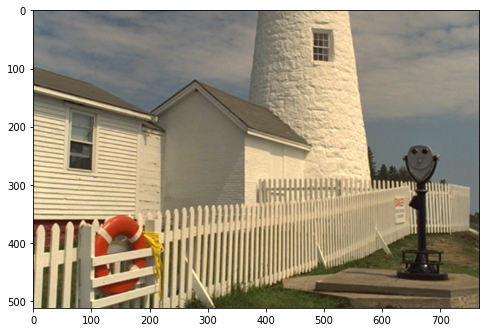

In [ ]:
gray= cv2.cvtColor(tampered1,cv2.COLOR_BGR2GRAY) 

original1, index=get_original(tampered_images[idx])
if index!=-1:
    plot_image(original1)

In [ ]:
def siftDetector(img):
    sift = cv2.xfeatures2d.SIFT_create()
    gray= cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 
    key_points, descriptors = sift.detectAndCompute(gray, None)
    return key_points,descriptors

In [ ]:
key_points,descriptors=siftDetector(tampered1)

In [ ]:
descriptors

array([[  0.,   0.,   0., ...,   0.,   0.,   2.],
       [  0.,   0.,   0., ...,   0.,   0.,  15.],
       [  0.,   0.,   1., ...,   0.,   0.,   1.],
       ...,
       [  2.,   1.,   1., ...,   2.,   2.,   5.],
       [ 35.,  34., 152., ...,   0.,   0.,   0.],
       [ 13.,   2.,   0., ...,   4.,   1.,   2.]], dtype=float32)

In [ ]:
def show_sift_features(color_img, kp,size=(8,8)):
    gray_img=cv2.cvtColor(color_img,cv2.COLOR_BGR2GRAY)
    plt.figure(figsize = size)
    plt.imshow(cv2.drawKeypoints(gray_img, kp, color_img.copy()))

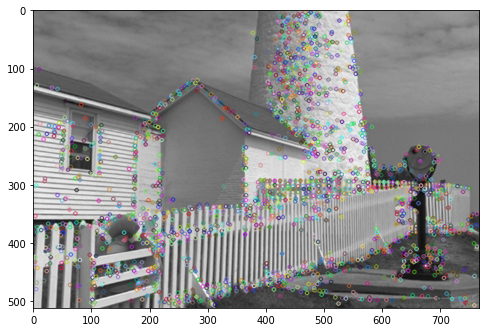

In [ ]:
show_sift_features(tampered1,key_points)

In [ ]:
img = cv2.drawKeypoints(gray,
                        key_points,
                        tampered1,
                        flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

print(img)

[[[122 122 122]
  [119 119 119]
  [117 117 117]
  ...
  [137 137 137]
  [136 136 136]
  [135 135 135]]

 [[117 117 117]
  [117 117 117]
  [115 115 115]
  ...
  [138 138 138]
  [136 136 136]
  [135 135 135]]

 [[118 118 118]
  [118 118 118]
  [116 116 116]
  ...
  [138 138 138]
  [137 137 137]
  [137 137 137]]

 ...

 [[125 125 125]
  [164 164 164]
  [203 203 203]
  ...
  [120 120 120]
  [117 117 117]
  [113 113 113]]

 [[124 124 124]
  [162 162 162]
  [200 200 200]
  ...
  [124 124 124]
  [120 120 120]
  [115 115 115]]

 [[125 125 125]
  [160 160 160]
  [196 196 196]
  ...
  [107 107 107]
  [110 110 110]
  [113 113 113]]]


In [ ]:
cv2.imwrite('/content/drive/MyDrive/Forensik/Forensik/Output/keypoints.png', img)

True

In [ ]:
tampered=cv2.imread(tampered_images[idx])
key_points,descriptors=siftDetector(tampered)

In [ ]:
def make_clusters(de,eps=50,min_sample=2):
    clustering = DBSCAN(eps=eps, min_samples=min_sample).fit(de)
    return clustering

In [ ]:
clusters=make_clusters(descriptors)

In [ ]:
def locate_forgery(img,clustering,kps):
    forgery=img.copy()
    clusters = [[] for i in range(np.unique(clustering.labels_).shape[0]-1)]
    for idx in range(len(kps)):
        if clustering.labels_[idx]!=-1:
            clusters[clustering.labels_[idx]].append((int(kps[idx].pt[0]),int(kps[idx].pt[1])))
    print(clusters)
    for points in clusters:
        if len(points)>1:
            for idx1 in range(len(points)):
                for idx2 in range(idx1+1,len(points)):
                    cv2.line(forgery,points[idx2],points[idx1],(255,255,0),2)
    return forgery

In [ ]:
key_points[127].pt[1]

226.57037353515625

In [ ]:
clusters1 = [[] for i in range(np.unique(clusters.labels_).shape[0]-1)]

In [ ]:
clusters1

[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], []]

In [ ]:
clusters1[clusters.labels_[0]].append((int(key_points[0].pt[0]),int(key_points[0].pt[1])))

In [ ]:
clusters.labels_[0]

-1

In [ ]:
clusters1[clusters.labels_[0]]

[(3, 439)]

In [ ]:
unique, counts = np.unique(clusters.labels_, return_counts=True)

In [ ]:
print(np.asarray((unique, counts)).T)

[[  -1 2418]
 [   0    2]
 [   1    2]
 [   2    2]
 [   3    2]
 [   4    5]
 [   5    2]
 [   6    2]
 [   7    3]
 [   8    2]
 [   9    2]
 [  10    2]
 [  11    2]
 [  12    3]
 [  13    2]
 [  14    2]
 [  15    2]
 [  16    2]
 [  17    2]
 [  18    2]]


In [ ]:
for idx in range(len(key_points)):
        if clusters.labels_[idx]!=-1:
          clusters1[clusters.labels_[idx]].append([int(key_points[idx].pt[0]),int(key_points[idx].pt[1])])
       
print(clusters1)

[[[48, 251], [48, 226]], [[66, 226], [66, 227]], [[113, 263], [114, 241]], [[130, 307], [130, 307]], [[217, 168], [238, 153], [308, 150], [311, 153], [315, 156]], [[222, 419], [222, 419]], [[241, 143], [260, 130]], [[305, 144], [312, 150], [322, 159]], [[480, 209], [487, 72]], [[481, 134], [483, 49]], [[490, 143], [492, 60]], [[490, 143], [492, 60]], [[492, 202], [504, 142], [506, 61]], [[500, 142], [502, 60]], [[503, 146], [504, 64]], [[503, 146], [504, 64]], [[504, 142], [506, 61]], [[507, 74], [508, 155]], [[574, 261], [574, 261]]]


In [ ]:
clusters1[7]

[[305, 144], [312, 150], [322, 159]]

In [ ]:
locate_forgery(tampered,clusters,key_points)

[[(48, 251), (48, 226)], [(66, 226), (66, 227)], [(113, 263), (114, 241)], [(130, 307), (130, 307)], [(217, 168), (238, 153), (308, 150), (311, 153), (315, 156)], [(222, 419), (222, 419)], [(241, 143), (260, 130)], [(305, 144), (312, 150), (322, 159)], [(480, 209), (487, 72)], [(481, 134), (483, 49)], [(490, 143), (492, 60)], [(490, 143), (492, 60)], [(492, 202), (504, 142), (506, 61)], [(500, 142), (502, 60)], [(503, 146), (504, 64)], [(503, 146), (504, 64)], [(504, 142), (506, 61)], [(507, 74), (508, 155)], [(574, 261), (574, 261)]]


array([[[124, 124, 116],
        [122, 121, 113],
        [121, 119, 111],
        ...,
        [135, 137, 139],
        [134, 136, 138],
        [133, 135, 137]],

       [[120, 120, 110],
        [121, 119, 110],
        [122, 117, 110],
        ...,
        [137, 138, 138],
        [135, 136, 137],
        [134, 135, 136]],

       [[121, 121, 111],
        [122, 120, 111],
        [122, 118, 110],
        ...,
        [138, 138, 137],
        [138, 137, 136],
        [138, 137, 136]],

       ...,

       [[100, 123, 139],
        [136, 163, 178],
        [171, 202, 217],
        ...,
        [ 85, 118, 138],
        [ 81, 115, 135],
        [ 78, 111, 131]],

       [[ 99, 121, 138],
        [134, 160, 176],
        [167, 199, 215],
        ...,
        [ 88, 122, 142],
        [ 84, 118, 138],
        [ 79, 113, 133]],

       [[ 99, 123, 139],
        [130, 158, 175],
        [162, 195, 212],
        ...,
        [ 71, 104, 125],
        [ 74, 107, 128],
        [ 78, 111, 131]]

In [ ]:
# Change Eps parameter to mark more/less features
clusters=make_clusters(descriptors,eps=50)
wew = locate_forgery(tampered,clusters,key_points)

[[(48, 251), (48, 226)], [(66, 226), (66, 227)], [(113, 263), (114, 241)], [(130, 307), (130, 307)], [(217, 168), (238, 153), (308, 150), (311, 153), (315, 156)], [(222, 419), (222, 419)], [(241, 143), (260, 130)], [(305, 144), (312, 150), (322, 159)], [(480, 209), (487, 72)], [(481, 134), (483, 49)], [(490, 143), (492, 60)], [(490, 143), (492, 60)], [(492, 202), (504, 142), (506, 61)], [(500, 142), (502, 60)], [(503, 146), (504, 64)], [(503, 146), (504, 64)], [(504, 142), (506, 61)], [(507, 74), (508, 155)], [(574, 261), (574, 261)]]


In [ ]:
cv2.imwrite('/content/drive/MyDrive/Forensik/Forensik/Result/1cluster.png',locate_forgery(tampered,clusters,key_points))

[[(48, 251), (48, 226)], [(66, 226), (66, 227)], [(113, 263), (114, 241)], [(130, 307), (130, 307)], [(217, 168), (238, 153), (308, 150), (311, 153), (315, 156)], [(222, 419), (222, 419)], [(241, 143), (260, 130)], [(305, 144), (312, 150), (322, 159)], [(480, 209), (487, 72)], [(481, 134), (483, 49)], [(490, 143), (492, 60)], [(490, 143), (492, 60)], [(492, 202), (504, 142), (506, 61)], [(500, 142), (502, 60)], [(503, 146), (504, 64)], [(503, 146), (504, 64)], [(504, 142), (506, 61)], [(507, 74), (508, 155)], [(574, 261), (574, 261)]]


True